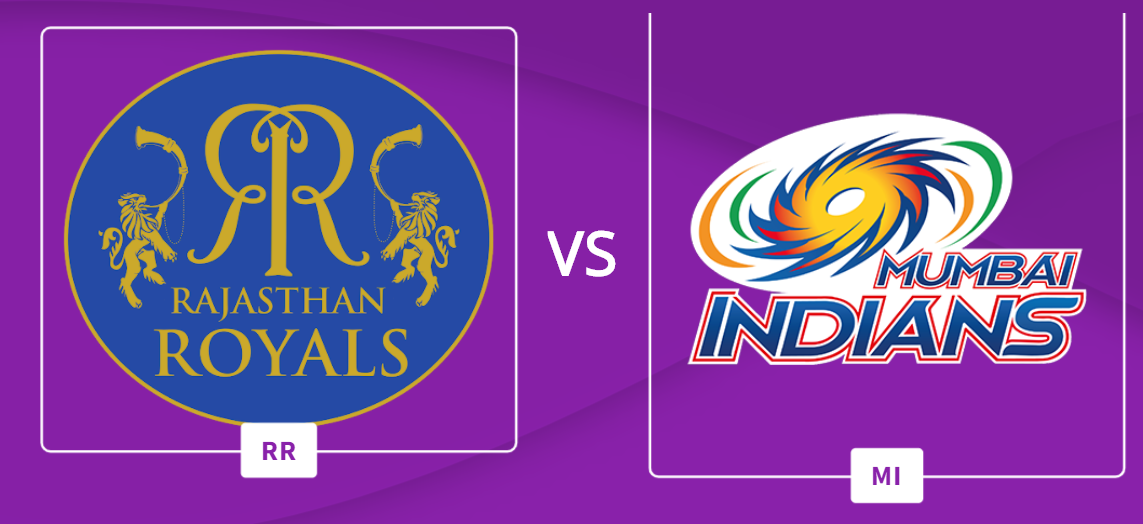

In [319]:
#!pip install bqplot
#!pip install ipywidgets
#!pip install ipympl
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager
#!jupyter nbextension install --user --py widgetsnbextension
#!jupyter nbextension enable --user --py widgetsnbextension
#!pip install plotly
#!pip install cufflinks


import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets
import plotly.express as px
import plotly.graph_objects as go
import bqplot
from bqplot import Pie
from collections import Counter
from bqplot import DateScale, LinearScale, Lines, Axis, Figure
from bqplot import Tooltip
import cufflinks as cf
from matplotlib.patches import ConnectionPatch
from matplotlib.gridspec import GridSpec
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
pd.set_option('display.max_columns', 50)
%matplotlib widget


In [320]:
matches = pd.read_csv("matches.csv")
deliveries =  pd.read_csv("deliveries.csv")
IPL_data = pd.merge(deliveries, matches[['id','season', 'team1', 'team2', 'toss_winner', 'toss_decision','winner','result', 'dl_applied','win_by_runs','win_by_wickets', 'venue' ]], 
                    left_on='match_id', right_on='id')

In [321]:
# Squad
# MI:
MI_batsmen = ['RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']
MI_bowlers = ['JJ Bumrah', 'TA Boult', 'NM Coulter-Nile', 'RD Chahar', 'KH Pandya', 'KA Pollard']
#J Pattinson data not available

#RR
RR_bowlers = ['J Archer' , 'AS Rajpoot', 'S Gopal' , 'JD Unadkat', 'R Tewatia', 'BA Stokes', 'S Tyagi']
RR_batsmen = ['RV Uthappa','BA Stokes', 'SV Samson', 'SPD Smith', 'JC Buttler', 'R Tewatia','J Archer','R Parag']

batsmen_MI_RR = ['RV Uthappa','BA Stokes', 'SV Samson', 'SPD Smith', 'JC Buttler', 'R Tewatia','J Archer','R Parag',
                'RG Sharma', 'Q de Kock', 'SA Yadav', 'Ishan Kishan', 'HH Pandya', 'KH Pandya', 'KA Pollard']

# Question 1: Who will win the match?

In [322]:
MI_RR_matches = matches[((matches.team1 == "Mumbai Indians") & (matches.team2 == "Rajasthan Royals")) |
                   ((matches.team2 == "Mumbai Indians") & (matches.team1 == "Rajasthan Royals"))]

win_SC = pd.DataFrame(MI_RR_matches['winner'].value_counts())
win_SC['Team_name'] = win_SC.index
win_SC

color_ = ['LightBlue', 'Yellow']
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(8,5)

plt.xticks(fontsize=14)
plt.yticks(fontsize=16)
plt.bar(win_SC['Team_name'], win_SC['winner'], color=color_, alpha=0.8)

    
plt.title('Number of Wins by MI and RR',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Count for total number of matches won',fontsize=14)
#plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'Count for total number of matches won')

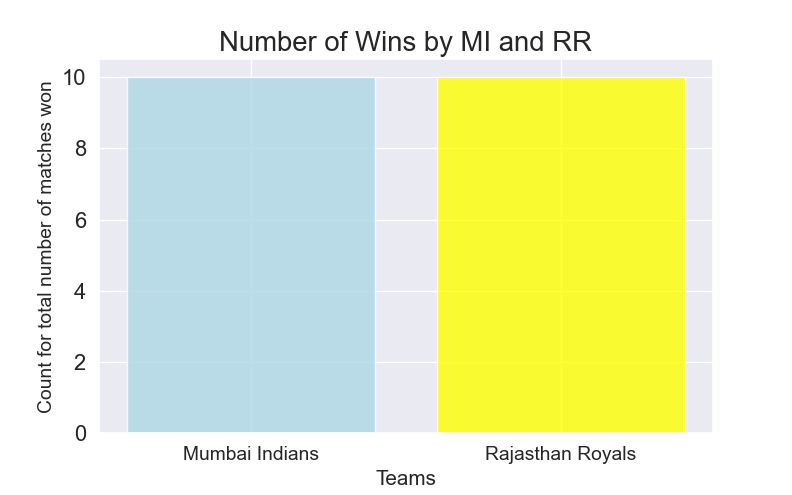

In [323]:
venue = "Sheikh Zayed Stadium"
MI_matches =  matches[(matches.team1 == "Mumbai Indians") | (matches.team2 == "Mumbai Indians")]
MI_matches[MI_matches.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
457,458,2014,Abu Dhabi,2014-04-16,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,normal,0,Kolkata Knight Riders,41,0,JH Kallis,Sheikh Zayed Stadium,M Erasmus,RK Illingworth,NaN


In [324]:
RR_matches =  matches[(matches.team1 == "Rajasthan Royals") | (matches.team2 == "Rajasthan Royals")]
RR_matches[RR_matches.venue == venue]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
460,461,2014,Abu Dhabi,2014-04-18,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,4,AM Rahane,Sheikh Zayed Stadium,BF Bowden,RK Illingworth,NaN
470,471,2014,Abu Dhabi,2014-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,6,PV Tambe,Sheikh Zayed Stadium,HDPK Dharmasena,C Shamshuddin,NaN
475,476,2014,Abu Dhabi,2014-04-29,Rajasthan Royals,Kolkata Knight Riders,Rajasthan Royals,bat,tie,0,Rajasthan Royals,0,0,JP Faulkner,Sheikh Zayed Stadium,Aleem Dar,AK Chaudhary,NaN


## Above data is not useful hence , this question is concluded from the analysis done in below questions.
# Conclusion: MI will win today

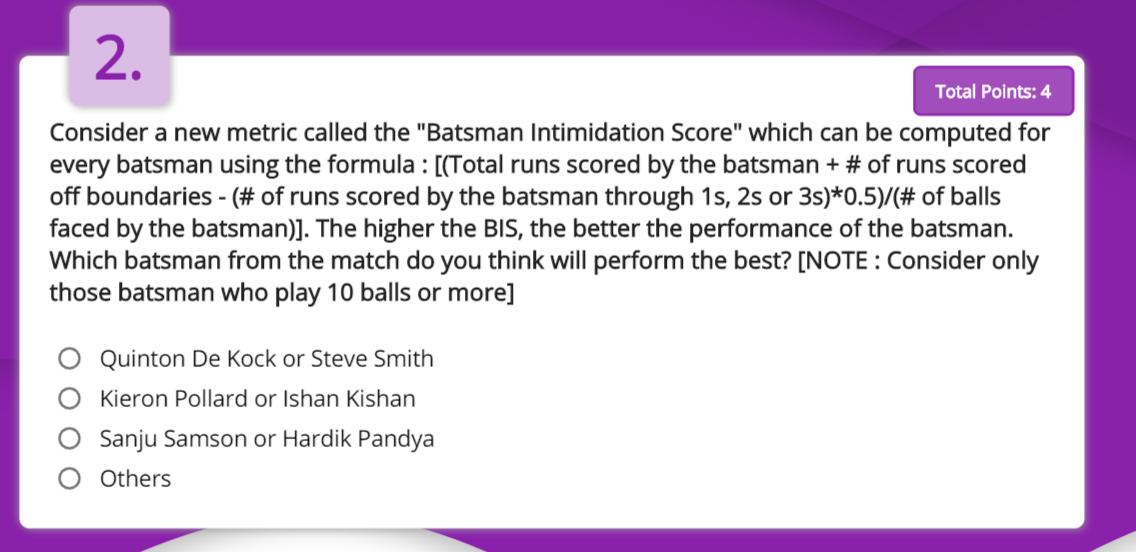

## 2.1 : Overall IPL Performance

In [325]:
batsmen  = deliveries[deliveries.batsman.isin(batsmen_MI_RR)]
# Total runs by the batsman
total_runs = batsmen[batsmen.extra_runs == 0].groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs_scored")

# Number of runs scored off the boundaries
x = batsmen[((batsmen.batsman_runs == 4) & (batsmen.extra_runs != 4)) | ((batsmen.batsman_runs == 6) & (batsmen.extra_runs != 6))]
runs_scoredoff_boundaries = x.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_off_boundaries")

# Number of runs scored by the batsman by 1s, 2s or 3s
runs_123 = batsmen[((batsmen.batsman_runs ==3) & (batsmen.extra_runs != 3)) | ((batsmen.batsman_runs ==2) & (batsmen.extra_runs != 2)) | ((batsmen.batsman_runs ==1) & (batsmen.extra_runs != 1))]
runs_1s_2s_3s = runs_123.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_1s2s3s")

# Number of balls_faced by batsman
balls_faced = batsmen.groupby(['batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")


BIS = pd.DataFrame(list(zip(balls_faced.batsman,balls_faced.balls_faced, runs_1s_2s_3s.runs_1s2s3s, runs_scoredoff_boundaries.runs_off_boundaries, 
                           total_runs.total_runs_scored)), 
               columns =['batsman','balls_faced','runs_1s2s3s', 'runsoff_boundaries', 'total_runs'])

BIS["BIS"] = ((BIS.total_runs + BIS.runsoff_boundaries - (BIS.runs_1s2s3s)*0.5)/(BIS.balls_faced))
BIS.sort_values(by=['BIS'], inplace=True, ascending=False)
BIS_MI = BIS[BIS.batsman.isin(MI_batsmen)]
BIS_RR = BIS[BIS.batsman.isin(RR_batsmen)]


display_side_by_side([BIS_MI, BIS_RR], ['BIS for MI Batsmen', 'BIS for RR Batsmen'])
fig = px.bar(BIS, x="batsman", y='BIS',
             hover_data=['batsman','balls_faced', 'runs_1s2s3s', 'runsoff_boundaries', 'total_runs',  'BIS'],color = 'batsman',title=' Figure 1 : BIS of MI and RR batsmen')
#fig.show()

,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
1,HH Pandya,736,369,702,1071,2.158288
5,KA Pollard,1964,971,1778,2744,2.055244
6,KH Pandya,635,337,554,891,2.010236
2,Ishan Kishan,546,235,460,695,1.900183
7,Q de Kock,1136,507,948,1460,1.896567
10,RG Sharma,3816,1995,2888,4868,1.771095
12,SA Yadav,479,266,342,602,1.693111
,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
4,JC Buttler,954,456,926,1385,2.183438
3,J Archer,62,35,48,81,1.798387


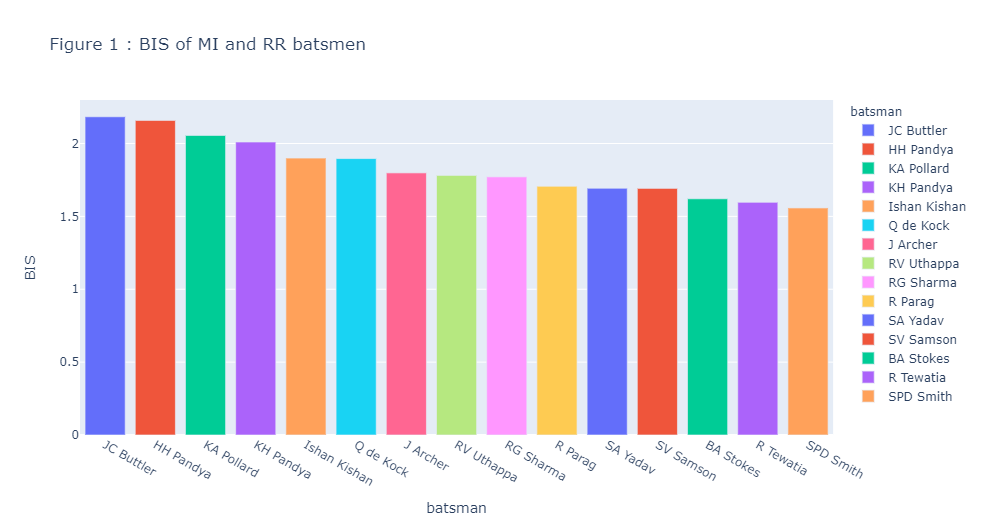

## 2.2 MI vs RR Head to Head BIS

### 2.2.1 MI: batting,  RR: Bowling

In [326]:
MI  = deliveries[(deliveries.batsman.isin(MI_batsmen)) & (deliveries.bowler.isin(RR_bowlers))]
# Total runs by the MI batsmen agains RR bowlers
total_runs_m = MI[MI.extra_runs == 0].groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs_scored")

# Number of runs scored off the boundaries
x_ = MI[((MI.batsman_runs == 4) & (MI.extra_runs != 4)) | ((MI.batsman_runs == 6) & (MI.extra_runs != 6))]
runs_scoredoff_boundaries_m = x_.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_off_boundaries")

# Number of runs scored by the batsman by 1s, 2s or 3s
runs_123_ = MI[((MI.batsman_runs ==3) & (MI.extra_runs != 3)) | ((MI.batsman_runs ==2) & (MI.extra_runs != 2)) | ((MI.batsman_runs ==1) & (MI.extra_runs != 1))]
runs_1s_2s_3s_m = runs_123_.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_1s2s3s")

# Number of balls_faced by batsman
balls_faced_m = MI.groupby(['batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")


BIS_M = pd.DataFrame(list(zip(balls_faced_m.batsman,balls_faced_m.balls_faced, runs_1s_2s_3s_m.runs_1s2s3s, runs_scoredoff_boundaries_m.runs_off_boundaries, 
                           total_runs_m.total_runs_scored)), 
               columns =['batsman','balls_faced','runs_1s2s3s', 'runsoff_boundaries', 'total_runs'])

BIS_M["BIS"] = ((BIS_M.total_runs + BIS_M.runsoff_boundaries - (BIS_M.runs_1s2s3s)*0.5)/(BIS_M.balls_faced))
BIS_M.sort_values(by=['BIS'], inplace=True, ascending=False)
fig = px.bar(BIS_M, x="batsman", y='BIS',
             hover_data=['batsman','balls_faced', 'runs_1s2s3s', 'runsoff_boundaries', 'total_runs',  'BIS'],color = 'batsman',title=' Figure 2 : BIS of MI batsmen against RR bowlers')
#fig.show()

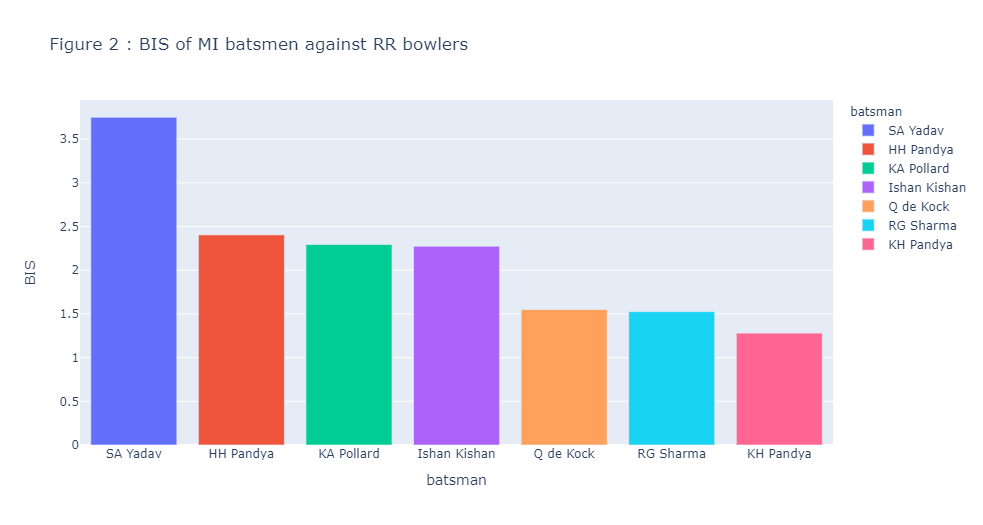

### 2.2.2 RR: batting,  MI: Bowling

In [327]:
RR  = deliveries[(deliveries.batsman.isin(RR_batsmen)) & (deliveries.bowler.isin(MI_bowlers))]
# Total runs by the MI batsmen agains RR bowlers
total_runs_r = RR[RR.extra_runs == 0].groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_runs_scored")

# Number of runs scored off the boundaries
x1 = RR[((RR.batsman_runs == 4) & (RR.extra_runs != 4)) | ((RR.batsman_runs == 6) & (RR.extra_runs != 6))]
runs_scoredoff_boundaries_r = x1.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_off_boundaries")

# Number of runs scored by the batsman by 1s, 2s or 3s
runs_123_1 = RR[((MI.batsman_runs ==3) & (RR.extra_runs != 3)) | ((RR.batsman_runs ==2) & (RR.extra_runs != 2)) | ((RR.batsman_runs ==1) & (RR.extra_runs != 1))]
runs_1s_2s_3s_r = runs_123_1.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_1s2s3s")

# Number of balls_faced by batsman
balls_faced_r = RR.groupby(['batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")


BIS_R = pd.DataFrame(list(zip(balls_faced_r.batsman,balls_faced_r.balls_faced, runs_1s_2s_3s_r.runs_1s2s3s, runs_scoredoff_boundaries_r.runs_off_boundaries, 
                           total_runs_r.total_runs_scored)), 
               columns =['batsman','balls_faced','runs_1s2s3s', 'runsoff_boundaries', 'total_runs'])

BIS_R["BIS"] = ((BIS_R.total_runs + BIS_R.runsoff_boundaries - (BIS_R.runs_1s2s3s)*0.5)/(BIS_R.balls_faced))
BIS_R.sort_values(by=['BIS'], inplace=True, ascending=False)
fig = px.bar(BIS_R, x="batsman", y='BIS',
             hover_data=['batsman','balls_faced', 'runs_1s2s3s', 'runsoff_boundaries', 'total_runs',  'BIS'],color = 'batsman',title=' Figure 3 : BIS of RR batsmen against MI bowlers')
#fig.show()
display_side_by_side([BIS_M, BIS_R], ['Batting Team = MI | Bowling Team = RR', 'Batting Team = RR | Bowling Team = MI'])

,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
6,SA Yadav,8,4,14,18,3.750000
0,HH Pandya,68,31,74,105,2.404412
2,KA Pollard,80,39,82,121,2.293750
1,Ishan Kishan,51,32,50,82,2.274510
4,Q de Kock,70,41,44,85,1.550000
5,RG Sharma,77,27,52,79,1.525974
3,KH Pandya,41,17,22,39,1.280488
,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
4,R Tewatia,3,2,6,8,4.333333
2,JC Buttler,60,28,56,84,2.100000


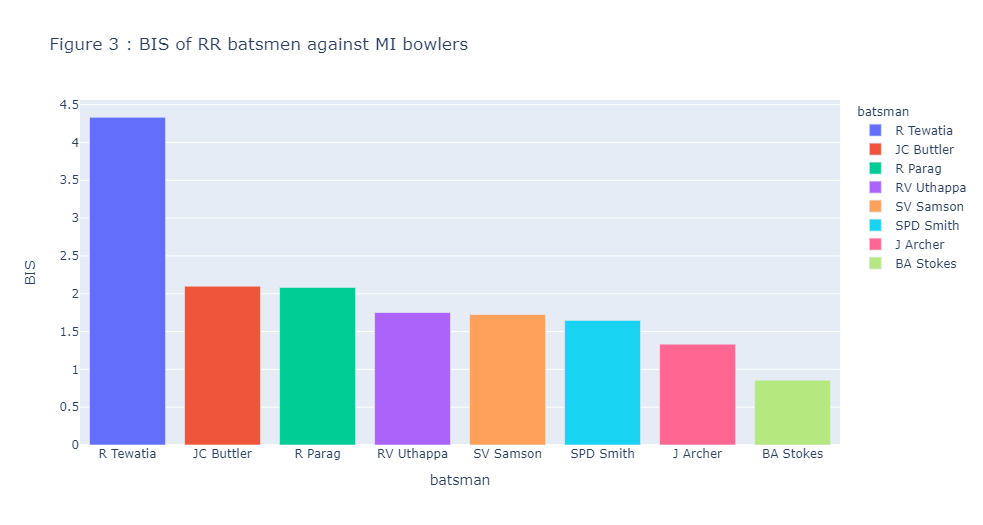

## Batting sequence is also very Important here

In [328]:
MI_sequence = ['Q de Kock', 'RG Sharma', 'SA Yadav', 'Ishan Kishan', 'HH Pandya']
RR_sequence = ['RV Uthappa', 'BA Stokes','SV Samson', 'SPD Smith', 'JC Buttler']
#df1 = [BIS_MI[BIS_MI.batsman.isin(MI_sequence)]
       
display_side_by_side([
    BIS_MI[BIS_MI.batsman.isin(MI_sequence)],
     BIS_RR[BIS_RR.batsman.isin(RR_sequence)],
      BIS_M[BIS_M.batsman.isin(MI_sequence)],
       BIS_R[BIS_R.batsman.isin(RR_sequence)]
       ],
       ['MI Batsmen sequence wise',
        'RR Batsmen sequence wise',
        'Batting Team = MI | Bowling Team = RR', 
        'Batting Team = RR | Bowling Team = MI']
       )

,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
1,HH Pandya,736,369,702,1071,2.158288
2,Ishan Kishan,546,235,460,695,1.900183
7,Q de Kock,1136,507,948,1460,1.896567
10,RG Sharma,3816,1995,2888,4868,1.771095
12,SA Yadav,479,266,342,602,1.693111
,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
4,JC Buttler,954,456,926,1385,2.183438
11,RV Uthappa,3492,1718,2676,4403,1.781214
14,SV Samson,1728,996,1214,2208,1.692130
0,BA Stokes,493,314,322,634,1.620690


## 2.3: let's consider matchwise average

In [329]:
# Total runs by the batsman
total_runs_avg = batsmen[batsmen.extra_runs == 0].groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "total_runs_scored")

# Number of runs scored off the boundaries
x = batsmen[((batsmen.batsman_runs == 4) & (batsmen.extra_runs != 4)) | ((batsmen.batsman_runs == 6) & (batsmen.extra_runs != 6))]
runs_scoredoff_boundaries_avg = x.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_off_boundaries")

# Number of runs scored by the batsman by 1s, 2s or 3s
runs_123 = batsmen[((batsmen.batsman_runs ==3) & (batsmen.extra_runs != 3)) | ((batsmen.batsman_runs ==2) & (batsmen.extra_runs != 2)) | ((batsmen.batsman_runs ==1) & (batsmen.extra_runs != 1))]
runs_1s_2s_3s_avg = runs_123.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_1s2s3s")

# Number of balls_faced by batsman
balls_faced_avg = batsmen.groupby(['match_id','batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")


BIS_avg = pd.DataFrame(list(zip(balls_faced_avg.match_id, balls_faced_avg.batsman,balls_faced_avg.balls_faced, runs_1s_2s_3s_avg.runs_1s2s3s, runs_scoredoff_boundaries_avg.runs_off_boundaries, 
                           total_runs_avg.total_runs_scored)), 
               columns =['match_id','batsman','balls_faced','runs_1s2s3s', 'runsoff_boundaries', 'total_runs'])

a1 =[]
a2 = []
a3 = []
a4 = []
a5 = []
for i in BIS_avg.batsman.unique():
     i1 = BIS_avg[BIS_avg.batsman ==i]
     a1.append(i)
     a2.append(i1.balls_faced.mean())
     a3.append(i1.runs_1s2s3s.mean())
     a4.append(i1.runsoff_boundaries.mean())
     a5.append(i1.total_runs.mean())
     
BIS_AVG = pd.DataFrame(list(zip(a1,a2,a3,a4,a5)), 
               columns =['batsman','balls_faced','runs_1s2s3s', 'runsoff_boundaries', 'total_runs'])
   

BIS_AVG["BIS"] = ((BIS_AVG.total_runs + BIS_AVG.runsoff_boundaries - (BIS_AVG.runs_1s2s3s)*0.5)/(BIS_AVG.balls_faced))
BIS_AVG .sort_values(by=['BIS'], inplace=True, ascending=False)
BIS_AVG_MI = BIS_AVG [BIS_AVG .batsman.isin(MI_batsmen)]
BIS_AVG_RR = BIS_AVG [BIS_AVG .batsman.isin(RR_batsmen)]


display_side_by_side([BIS_AVG_MI, BIS_AVG_RR], ['BIS for MI Batsmen(Average)', 'BIS for RR Batsmen(Average)'])


,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
9,SA Yadav,11.404762,9.642857,20.476190,23.023810,3.391441
1,HH Pandya,9.081081,9.486486,16.810811,16.945946,3.194940
4,KH Pandya,15.708333,8.416667,21.666667,28.458333,2.923077
3,KA Pollard,14.879310,11.267241,19.120690,25.568966,2.624855
10,Ishan Kishan,17.950000,9.100000,15.200000,24.300000,1.947075
5,RG Sharma,21.354430,9.575949,19.392405,22.253165,1.725993
12,Q de Kock,21.032258,11.354839,16.580645,22.451613,1.585890
,batsman,balls_faced,runs_1s2s3s,runsoff_boundaries,total_runs,BIS
11,R Tewatia,7.000000,9.000000,10.666667,15.666667,3.119048
13,J Archer,9.000000,6.000000,10.000000,21.000000,3.111111


## Conclusion from above data:  SA Yadav and Buttler seems to be leading according to Batting sequence of Both the teams

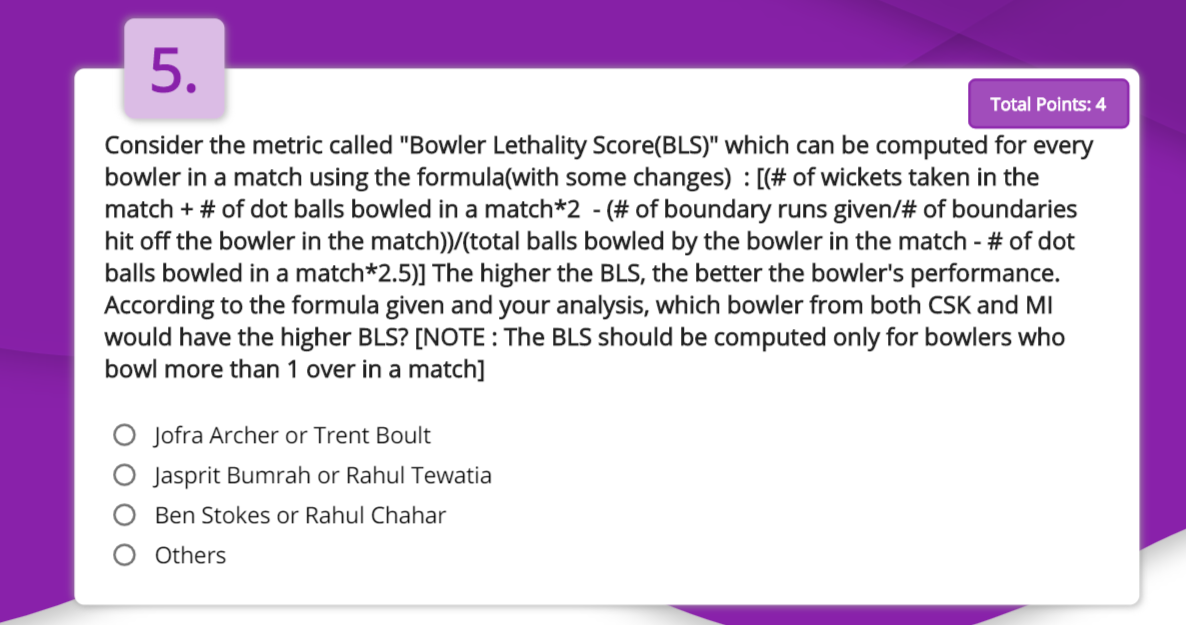

# correction : Which bowlers from RR/ MI

## 2.1 Overall performance in IPL

In [349]:
bowlers_MI_RR = deliveries[(deliveries.bowler.isin(MI_bowlers)) | (deliveries.bowler.isin(RR_bowlers))]
bowlers_MI_RR.player_dismissed.fillna(0, inplace = True)
# Number of wickets taken excluding run out and retired hurt
wickets = bowlers_MI_RR[(bowlers_MI_RR.player_dismissed != 0) & (bowlers_MI_RR.dismissal_kind != 'run out') & ((bowlers_MI_RR.dismissal_kind != 'retired hurt'))]
no_of_wickets = wickets.groupby(['bowler'])['player_dismissed'].count().reset_index(name = "wickets")

# no_of dot balls
dotballs = bowlers_MI_RR[bowlers_MI_RR.batsman_runs == 0].groupby(['bowler'])['batsman_runs'].count().reset_index(name = "dot_balls")

# Boundary runs given
br = bowlers_MI_RR[((bowlers_MI_RR.batsman_runs == 4) & (bowlers_MI_RR.extra_runs != 4)) | ((bowlers_MI_RR.batsman_runs == 6) & (bowlers_MI_RR.extra_runs != 6))]
boundary_runs = br.groupby(['bowler'])['batsman_runs'].sum().reset_index(name = "boundary_runs")

# No. of boundary runs given
no_boundary_runs = br.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_boundaries")

# Total balls bowled 
BLS = bowlers_MI_RR.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")
BLS["no_boundaries"] = no_boundary_runs.no_boundaries
BLS["boundary_runs"] = boundary_runs.boundary_runs
BLS["dot_balls"] = dotballs.dot_balls
BLS["wickets"] = no_of_wickets.wickets
BLS["BLS"] = ((BLS.wickets + BLS.dot_balls*2 - (BLS.boundary_runs/BLS.no_boundaries))/(BLS.balls_bowled - BLS.dot_balls*2.5))
BLS["BLS_absolute"] = ((BLS.wickets + BLS.dot_balls*2 - (BLS.boundary_runs/BLS.no_boundaries))/(abs(BLS.balls_bowled - BLS.dot_balls*2.5)))
BLS.sort_values(by=['BLS_absolute'], inplace=True, ascending=False)

#(2+16)-(18/4)/((24- (8*2.5)))
#(2+ 22 - (20/4))/(24/(11*2.5))
(16 -(8/2))/(25- (8*2.5))

2.4

In [331]:
fig = px.bar(BLS, x="bowler", y='BLS_absolute',
             hover_data=['bowler','balls_bowled', 'no_boundaries', 'boundary_runs', 'dot_balls',  'wickets', 'BLS_absolute'],color = 'bowler',title=' Figure 4 : BLS of MI and RR bowlers')
#fig.show()

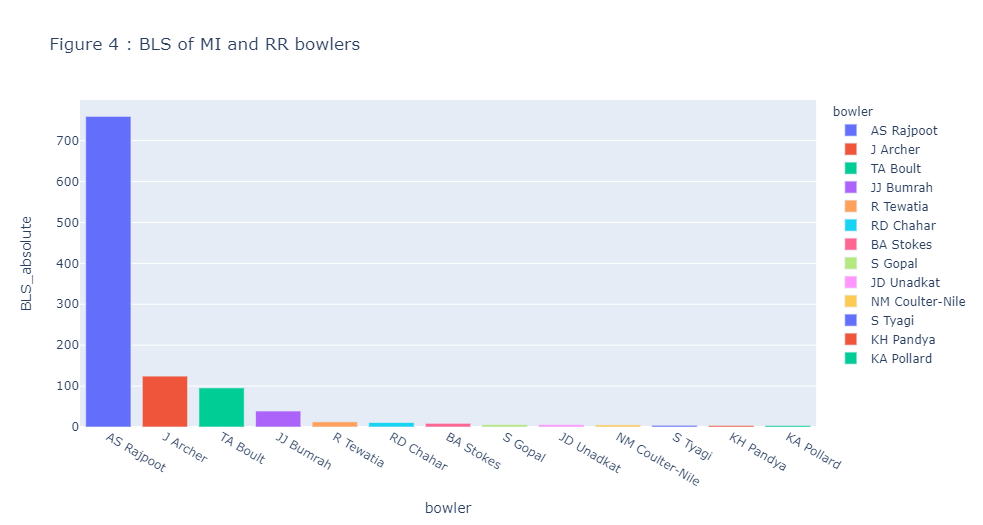

## 2.2 MI and RR bowlers when MI and RR is head to head

In [332]:
bowlers_MI = deliveries[((deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(RR_batsmen))) |
                       ((deliveries.bowler.isin(RR_bowlers)) & (deliveries.batsman.isin(MI_batsmen)))]
bowlers_MI.player_dismissed.fillna(0, inplace = True)

# Number of wickets taken excluding run out and retired hurt
wickets_ = bowlers_MI[(bowlers_MI.player_dismissed != 0) & (bowlers_MI.dismissal_kind != 'run out') & ((bowlers_MI.dismissal_kind != 'retired hurt'))]
no_of_wickets_ = wickets_.groupby(['bowler'])['player_dismissed'].count().reset_index(name = "wickets")

# no_of dot balls
dotballs_ = bowlers_MI[bowlers_MI.batsman_runs == 0].groupby(['bowler'])['batsman_runs'].count().reset_index(name = "dot_balls")

# Boundary runs given
br_ = bowlers_MI[((bowlers_MI.batsman_runs == 4) & (bowlers_MI.extra_runs != 4)) | ((bowlers_MI.batsman_runs == 6) & (bowlers_MI.extra_runs != 6))]
boundary_runs_ = br_.groupby(['bowler'])['batsman_runs'].sum().reset_index(name = "boundary_runs")

# No. of boundary runs given
no_boundary_runs_ = br_.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "no_boundaries")

# Total balls bowled 
BLS_ = bowlers_MI.groupby(['bowler'])['batsman_runs'].count().reset_index(name = "balls_bowled")

BLS_["no_boundaries"] = no_boundary_runs_.no_boundaries
BLS_["boundary_runs"] = boundary_runs_.boundary_runs
BLS_["dot_balls"] = dotballs_.dot_balls
BLS_["wickets"] = no_of_wickets_.wickets
BLS_.wickets.fillna(0, inplace = True)
BLS_["BLS"] = ((BLS_.wickets + BLS_.dot_balls*2 - (BLS_.boundary_runs/BLS_.no_boundaries))/(BLS_.balls_bowled - BLS_.dot_balls*2.5))
BLS_["BLS_absolute"] = ((BLS_.wickets + BLS_.dot_balls*2 - (BLS_.boundary_runs/BLS_.no_boundaries))/(abs(BLS_.balls_bowled - BLS_.dot_balls*2.5)))
BLS_.sort_values(by=['BLS_absolute'], inplace=True, ascending=False)
fig = px.bar(BLS_, x="bowler", y='BLS_absolute',
             hover_data=['bowler','balls_bowled', 'no_boundaries', 'boundary_runs', 'dot_balls',  'wickets', 'BLS_absolute'],color = 'bowler',title=' Figure 5: BLS of MI and RR bowlers (MI vs RR)')
#fig.show()

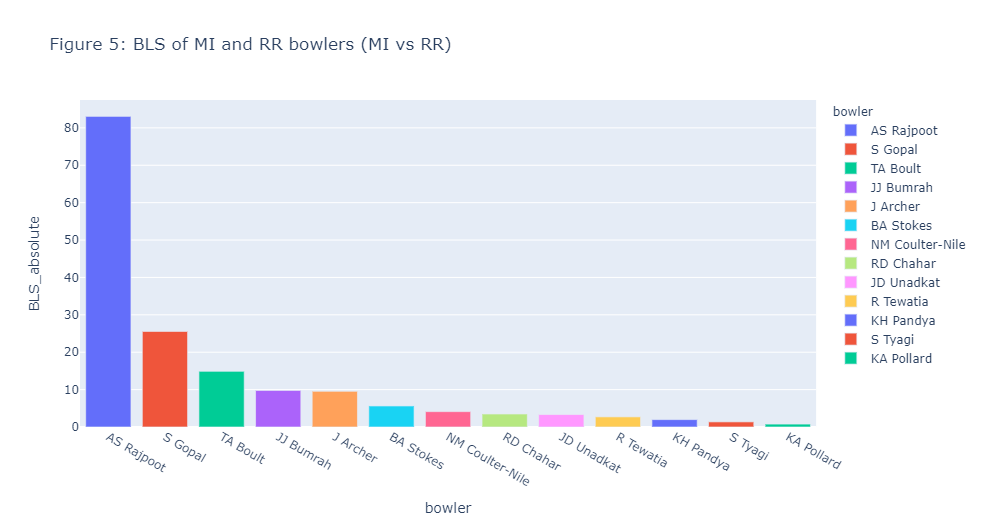

In [333]:
BLS_

,bowler,balls_bowled,no_boundaries,boundary_runs,dot_balls,wickets,BLS,BLS_absolute
0,AS Rajpoot,53,13,58,21,4.0,83.076923,83.076923
10,S Gopal,46,3,14,19,5.0,-25.555556,25.555556
12,TA Boult,50,8,38,21,0.0,-14.900000,14.900000
4,JJ Bumrah,149,22,102,55,7.0,9.770751,9.770751
2,J Archer,68,9,40,25,7.0,9.555556,9.555556
1,BA Stokes,54,5,22,19,3.0,5.630769,5.630769
7,NM Coulter-Nile,41,10,40,20,1.0,-4.111111,4.111111
9,RD Chahar,42,5,28,14,2.0,3.485714,3.485714
3,JD Unadkat,137,31,156,44,7.0,3.332139,3.332139
8,R Tewatia,25,7,38,8,3.0,2.714286,2.714286


## J Archer, TA Boult would have better BLS

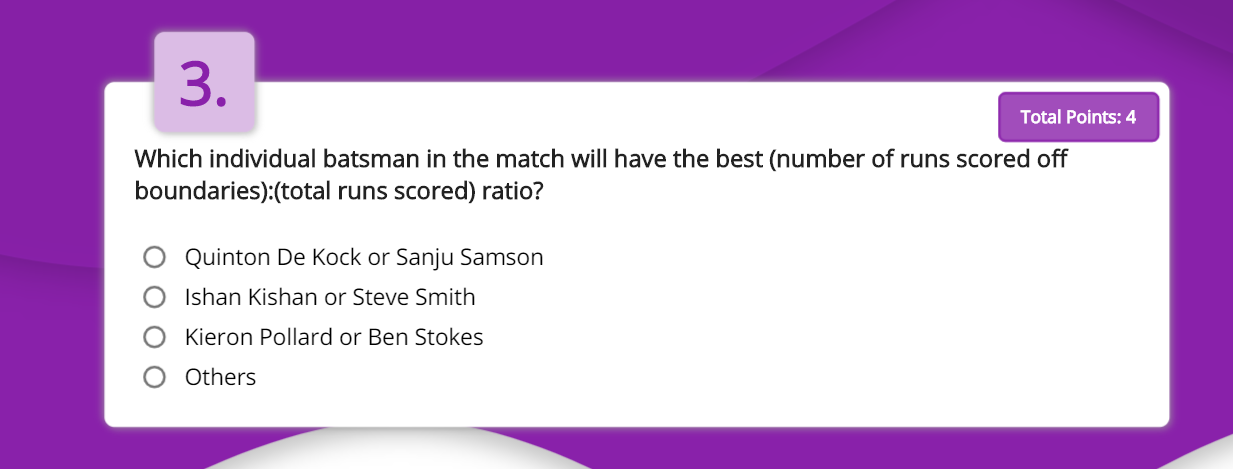

## 3.1 Overall

In [334]:
b = batsmen[((batsmen.batsman_runs == 4) & (batsmen.extra_runs != 4)) | ((batsmen.batsman_runs == 6) & (batsmen.extra_runs != 6))]
off_boundaries = batsmen.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_score")
b1 = b.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_offboundaries")
off_boundaries["runs_offboundaries"] = b1.runs_offboundaries
off_boundaries["Boundaries_total_Runs_ratio"] = off_boundaries.runs_offboundaries/off_boundaries.total_score
off_boundaries.sort_values(by=['Boundaries_total_Runs_ratio'], inplace=True, ascending=False)


## 3.2 Matchwise average

In [335]:
m1 = batsmen.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "total_score")
m2 = b.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_offboundaries")
m1["runs_offboundaries"] = m2.runs_offboundaries
m1.runs_offboundaries.fillna(0, inplace = True)
bm = []
ts = []
ofb =[]
for i in m1.batsman.unique():
    temp = m1[m1.batsman == i]
    bm.append(i)
    ts.append(temp.total_score.mean())
    ofb.append(temp.runs_offboundaries.mean())

BTR =  pd.DataFrame(list(zip(bm, ts, ofb)), 
               columns =['batsman', 'total_score', 'runs_offboundaries'])
BTR["boundaries_total_Runs_ratio"] = BTR.runs_offboundaries/BTR.total_score
BTR.sort_values(by = ['boundaries_total_Runs_ratio'], inplace=True, ascending=False)

    

## 3.3 MI VS RR
### 3.3.1 Overall

In [336]:
RR_MI = deliveries[((deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(RR_batsmen))) |
                       ((deliveries.bowler.isin(RR_bowlers)) & (deliveries.batsman.isin(MI_batsmen)))]
bRM = RR_MI[((RR_MI.batsman_runs == 4) & (RR_MI.extra_runs != 4)) | ((RR_MI.batsman_runs == 6) & (RR_MI.extra_runs != 6))]

off_boundaries_ = RR_MI.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "total_score")
b1_ = bRM.groupby(['batsman'])['batsman_runs'].sum().reset_index(name = "runs_offboundaries")
off_boundaries_["runs_offboundaries"] = b1_.runs_offboundaries
off_boundaries_["Boundaries_total_Runs_ratio"] = off_boundaries_.runs_offboundaries/off_boundaries.total_score
off_boundaries_.sort_values(by=['Boundaries_total_Runs_ratio'], inplace=True, ascending=False)



### 3.3.2 Matchwise average

In [337]:
m1_ = RR_MI.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "total_score")
m2_ = bRM.groupby(['match_id','batsman'])['batsman_runs'].sum().reset_index(name = "runs_offboundaries")
m1_["runs_offboundaries"] = m2_.runs_offboundaries
m1_.runs_offboundaries.fillna(0, inplace = True)
bm = []
ts = []
ofb =[]
for i in m1_.batsman.unique():
    temp = m1[m1.batsman == i]
    bm.append(i)
    ts.append(temp.total_score.mean())
    ofb.append(temp.runs_offboundaries.mean())

BTR_ =  pd.DataFrame(list(zip(bm, ts, ofb)), 
               columns =['batsman', 'total_score', 'runs_offboundaries'])
BTR_["boundaries_total_Runs_ratio"] = BTR_.runs_offboundaries/BTR_.total_score
BTR_.sort_values(by = ['boundaries_total_Runs_ratio'], inplace=True, ascending=False)


In [338]:
display_side_by_side([off_boundaries, off_boundaries_, BTR, BTR_], 
                     ['BTR Overall', 'BTR(matchwise average)', 'BTR MI vs RR', 'BTR MI vs RR (matchwise average)'])

,batsman,total_score,runs_offboundaries,Boundaries_total_Runs_ratio
4,JC Buttler,1431,926,0.647100
2,Ishan Kishan,711,460,0.646976
5,KA Pollard,2784,1778,0.638649
7,Q de Kock,1489,948,0.636669
1,HH Pandya,1118,702,0.627907
6,KH Pandya,915,554,0.605464
11,RV Uthappa,4446,2676,0.601889
10,RG Sharma,4914,2888,0.587709
8,R Parag,169,98,0.579882
3,J Archer,85,48,0.564706


## Conclusion: SA Yadav seems to be leading

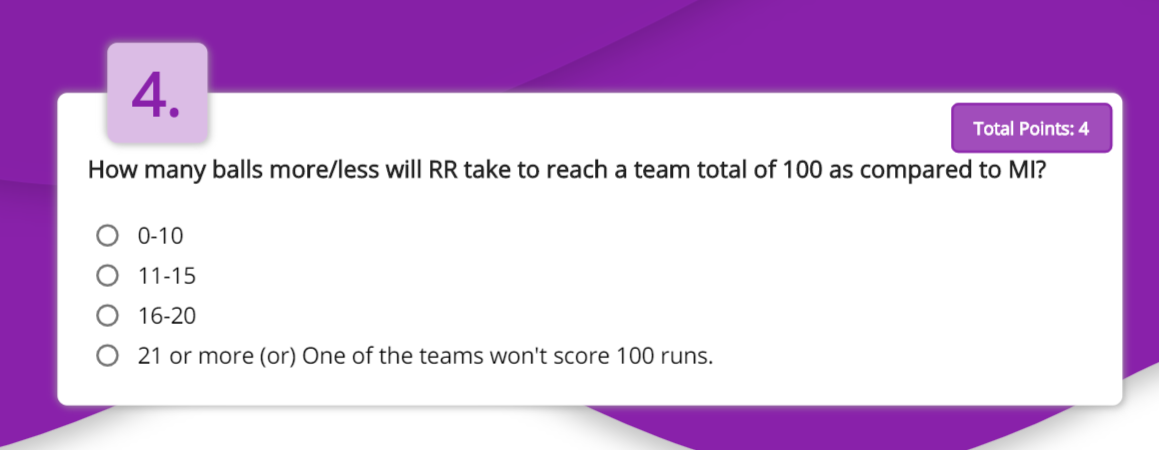

## 4.1 MI and RR batsmen's average scores in IPL overall

In [339]:
mi = deliveries[(deliveries.batsman.isin(MI_batsmen)) | (deliveries.batsman.isin(RR_batsmen))]
mi1 = mi.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
mi_temp = mi.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
mi1["runs_scored"] = mi_temp.runs_scored
miB = []
balls =[]
rs =[]
for i in mi1.batsman.unique():
    miX = mi1[mi1.batsman == i]
    miB.append(i)
    balls.append(round(miX.balls_faced.mean(),1))
    rs.append(round(miX.runs_scored.mean(),1))
mi_rr_overall = pd.DataFrame(list(zip(miB, balls, rs)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])

mi_ = mi_rr_overall[mi_rr_overall.batsman.isin(MI_batsmen)]
rr_ = mi_rr_overall[mi_rr_overall.batsman.isin(RR_batsmen)]
display_side_by_side([mi_, rr_], ['Average number of balls faced and Runs Scored by MI Batsmen', 'Average number of balls faced and Runs Scored by RR Batsmen'])

,batsman,balls_faced,runs_scored
1,HH Pandya,12.100000,18.300000
3,KA Pollard,14.900000,21.100000
4,KH Pandya,13.800000,19.900000
5,RG Sharma,21.000000,27.000000
9,SA Yadav,11.400000,14.500000
10,Ishan Kishan,16.500000,21.500000
12,Q de Kock,22.700000,29.800000
,batsman,balls_faced,runs_scored
0,BA Stokes,15.400000,20.200000
2,JC Buttler,21.200000,31.800000


## 4.2 Batting order wise

### Batting sequence of MI batsmen is(probable) :<br>Q de Kock<br>RG Sharma<br>SA Yadav<br>Ishan Kishan<br>HH Pandya<br>KA Pollard<br>KH Pandya


### Batting Sequence of RR Batsmen Probable:<br>RV Uthappa<br>BA Stokes<br>SV Samson<br>SPD Smith<br>JC Buttler<br>R Tewatia<br>R Parag


In [340]:
mi_sequence = ['Q de Kock','RG Sharma','SA Yadav','Ishan Kishan','HH Pandya','KA Pollard','KH Pandya']
rr_sequence = ['RV Uthappa','BA Stokes','SV Samson','SPD Smith','JC Buttler','R Tewatia','R Parag']
v = []
balls = []
batsm = []
for i in mi_sequence:
    batsm.append(i)
    balls.append(mi_[mi_.batsman == i].balls_faced.values[0])
    v.append(mi_[mi_.batsman == i].runs_scored.values[0])

v1 = []
balls1 = []
batsm1 = []
for i in rr_sequence:
    batsm1.append(i)
    balls1.append(rr_[rr_.batsman == i].balls_faced.values[0])
    v1.append(rr_[rr_.batsman == i].runs_scored.values[0])
    
    
def Cumulative(lists): 
    cu_list = [] 
    length = len(lists) 
    cu_list = [sum(lists[0:x:1]) for x in range(0, length+1)] 
    return cu_list[1:]

mi_score100 = pd.DataFrame(list(zip(batsm, Cumulative(balls), Cumulative(v))), 
               columns =['batsman', 'balls_faced(cumulative)', 'runs_scored(cumulative)'])
rr_score100 = pd.DataFrame(list(zip(batsm1, Cumulative(balls1), Cumulative(v1))), 
               columns =['batsman', 'balls_faced(cumulative)', 'runs_scored(cumulative)'])

display_side_by_side([mi_score100, rr_score100], ['Average number of balls faced and Runs Scored by MI Batsmen to score 100', 'Average number of balls faced and Runs Scored by RR Batsmen to score 100'])


,batsman,balls_faced(cumulative),runs_scored(cumulative)
0,Q de Kock,22.700000,29.800000
1,RG Sharma,43.700000,56.800000
2,SA Yadav,55.100000,71.300000
3,Ishan Kishan,71.600000,92.800000
4,HH Pandya,83.700000,111.100000
5,KA Pollard,98.600000,132.200000
6,KH Pandya,112.400000,152.100000
,batsman,balls_faced(cumulative),runs_scored(cumulative)
0,RV Uthappa,20.500000,26.200000
1,BA Stokes,35.900000,46.400000


### From above data the difference wuld be less than 10<br> Both teams would take upto 77-80 balls to score 100<br> but we need to consider the bowlers against whom these batsmen are scoring


## 4.3: MI vs RR (Batsmen performances against each others bowlers)

In [341]:

RM = deliveries[((deliveries.bowler.isin(MI_bowlers)) & (deliveries.batsman.isin(RR_batsmen))) |
                       ((deliveries.bowler.isin(RR_bowlers)) & (deliveries.batsman.isin(MI_batsmen)))]
mi1_ = RM.groupby(['match_id', 'batsman'])['batsman_runs'].count().reset_index(name = "balls_faced")
mi_temp_ = RM.groupby(['match_id', 'batsman'])['batsman_runs'].sum().reset_index(name = "runs_scored")
mi1_["runs_scored"] = mi_temp_.runs_scored
miB2 = []
balls2 =[]
rs2 =[]
for i in mi1_.batsman.unique():
    miX_ = mi1_[mi1_.batsman == i]
    miB2.append(i)
    balls2.append(round(miX_.balls_faced.mean(),1))
    rs2.append(round(miX_.runs_scored.mean(),1))
mi_rr_overall2 = pd.DataFrame(list(zip(miB2, balls2, rs2)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])

mi_2 = mi_rr_overall2[mi_rr_overall2.batsman.isin(MI_batsmen)]
rr_2 = mi_rr_overall2[mi_rr_overall2.batsman.isin(RR_batsmen)]
display_side_by_side([mi_2, rr_2], ['Average number of balls faced and Runs Scored by MI Batsmen against RR bowlers', 'Average number of balls faced and Runs Scored by RR Batsmen against MI bowlers'])

,batsman,balls_faced,runs_scored
1,HH Pandya,8.500000,13.900000
2,KA Pollard,5.000000,8.100000
3,KH Pandya,5.100000,5.200000
6,RG Sharma,4.500000,4.700000
9,Ishan Kishan,8.500000,13.700000
10,SA Yadav,8.000000,18.000000
11,Q de Kock,17.500000,22.000000
,batsman,balls_faced,runs_scored
0,BA Stokes,4.700000,4.500000
4,SPD Smith,13.100000,17.800000


## 4.4 : Batting order wise MI vs RR

In [342]:
v3 = []
balls3 = []
batsm3 = []
for i in mi_sequence:
    batsm3.append(i)
    balls3.append(mi_2[mi_2.batsman == i].balls_faced.values[0])
    v3.append(mi_2[mi_2.batsman == i].runs_scored.values[0])

v4 = []
balls4 = []
batsm4 = []
for i in rr_sequence:
    batsm4.append(i)
    balls4.append(rr_2[rr_2.batsman == i].balls_faced.values[0])
    v4.append(rr_2[rr_2.batsman == i].runs_scored.values[0])
    

mi_score100_ = pd.DataFrame(list(zip(batsm3, balls3, v3)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])
mi_score100_["strike_rate"] = mi_score100_.runs_scored*100/mi_score100_.balls_faced
mi_score100_["balls_faced_avg"] = balls # from part 4.2
mi_score100_["probable_runs"] = (mi_score100_.strike_rate*mi_score100_.balls_faced_avg)/100

rr_score100_ = pd.DataFrame(list(zip(batsm4, balls4, v4)), 
               columns =['batsman', 'balls_faced', 'runs_scored'])
rr_score100_["strike_rate"] = rr_score100_.runs_scored*100/rr_score100_.balls_faced
rr_score100_["balls_faced_avg"] = balls1 # from part 4.2
rr_score100_["probable_runs"] = (rr_score100_.strike_rate*rr_score100_.balls_faced_avg)/100

mi_score100_rr = pd.DataFrame(list(zip(mi_score100_.batsman, Cumulative(mi_score100_.balls_faced_avg), Cumulative(mi_score100_.probable_runs))), 
               columns =['batsman', 'balls_faced(cumulative)', 'prable_runs(cumulative)'])
rr_score100_mi = pd.DataFrame(list(zip(rr_score100_.batsman, Cumulative(rr_score100_.balls_faced_avg), Cumulative(rr_score100_.probable_runs))), 
               columns =['batsman', 'balls_faced(cumulative)', 'probable_runs(cumulative)'])

display_side_by_side([mi_, rr_], ['Average number of balls faced and Runs Scored by MI Batsmen', 'Average number of balls faced and Runs Scored by RR Batsmen'])
display_side_by_side([mi_score100, rr_score100], ['Average number of balls faced and Runs Scored by MI Batsmen to score 100', 'Average number of balls faced and Runs Scored by RR Batsmen to score 100'])
display_side_by_side([mi_score100_[['batsman','balls_faced_avg','probable_runs']], rr_score100_[['batsman','balls_faced_avg','probable_runs']]], ['Average number of balls faced and Runs Scored and strike rate of MI Batsmen against RR bowlers', 'Average number of balls faced and Runs Scored and strike rate of RR Batsmen against MI bowlers'])
display_side_by_side([mi_score100_rr, rr_score100_mi], ['Average number of balls faced and Runs Scored and strike rate of MI Batsmen against RR bowlers', 'Average number of balls faced and Runs Scored and strike rate of RR Batsmen against MI bowlers'])

,batsman,balls_faced,runs_scored
1,HH Pandya,12.100000,18.300000
3,KA Pollard,14.900000,21.100000
4,KH Pandya,13.800000,19.900000
5,RG Sharma,21.000000,27.000000
9,SA Yadav,11.400000,14.500000
10,Ishan Kishan,16.500000,21.500000
12,Q de Kock,22.700000,29.800000
,batsman,balls_faced,runs_scored
0,BA Stokes,15.400000,20.200000
2,JC Buttler,21.200000,31.800000


,batsman,balls_faced(cumulative),runs_scored(cumulative)
0,Q de Kock,22.700000,29.800000
1,RG Sharma,43.700000,56.800000
2,SA Yadav,55.100000,71.300000
3,Ishan Kishan,71.600000,92.800000
4,HH Pandya,83.700000,111.100000
5,KA Pollard,98.600000,132.200000
6,KH Pandya,112.400000,152.100000
,batsman,balls_faced(cumulative),runs_scored(cumulative)
0,RV Uthappa,20.500000,26.200000
1,BA Stokes,35.900000,46.400000


,batsman,balls_faced_avg,probable_runs
0,Q de Kock,22.700000,28.537143
1,RG Sharma,21.000000,21.933333
2,SA Yadav,11.400000,25.650000
3,Ishan Kishan,16.500000,26.594118
4,HH Pandya,12.100000,19.787059
5,KA Pollard,14.900000,24.138000
6,KH Pandya,13.800000,14.070588
,batsman,balls_faced_avg,probable_runs
0,RV Uthappa,20.500000,24.659420
1,BA Stokes,15.400000,14.744681


,batsman,balls_faced(cumulative),prable_runs(cumulative)
0,Q de Kock,22.700000,28.537143
1,RG Sharma,43.700000,50.470476
2,SA Yadav,55.100000,76.120476
3,Ishan Kishan,71.600000,102.714594
4,HH Pandya,83.700000,122.501653
5,KA Pollard,98.600000,146.639653
6,KH Pandya,112.400000,160.710241
,batsman,balls_faced(cumulative),probable_runs(cumulative)
0,RV Uthappa,20.500000,24.659420
1,BA Stokes,35.900000,39.404101


## Conclusion: from above result we can conclude that differnce won't be greater than 10